In [1]:
# basis
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

# display
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# data split 
from sklearn.model_selection import train_test_split

# engine
import keras
from keras.models import Sequential 
from keras.layers import Flatten,Dense

# global variables

In [2]:
SEED = 2021

TRAIN_PATH ="../input/fashionmnist/fashion-mnist_train.csv"
TEST_PATH = "../input/fashionmnist/fashion-mnist_test.csv"

TARGET = "label"
SCALE_SIZE = 255

TEST_SIZE = 0.25

class_labels= ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneakers','Bag','Ankle boot']

# load data

In [3]:
train=pd.read_csv(TRAIN_PATH)
test=pd.read_csv(TEST_PATH)

# target count check

<AxesSubplot:xlabel='count', ylabel='label'>

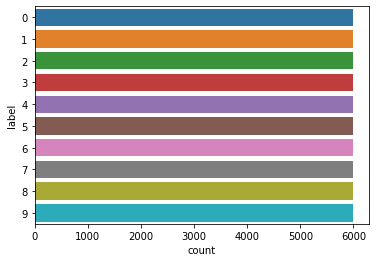

In [4]:
sns.countplot(data=train,y=TARGET)

# split data 

In [5]:
# split data #1 (input data and target data )
# train.csv => train target + train input 
y=train[TARGET] # target 
X= train.drop([TARGET],axis=1) # input
# test.csv => test target + test input 
y_test = test[TARGET] # this target is correct answer
X_test = test.drop([TARGET],axis=1) #input 

# split data #2 (train set and validation set)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=TEST_SIZE,random_state=SEED)

# define model

In [6]:
INPUT_SHAPE = (28,28)
TARGET_COUNT = 10
DENSE_COUNT_ARRAY = [50,20,30]

MID_ACTIVATION = "relu"
LAST_ACTIVATION = "softmax"

MODEL_OPTIMIZER = "adam"
MODEL_LOSS = "sparse_categorical_crossentropy"
MODEL_METRICS = ['accuracy']

BATCH_SIZE = 100
EPOCHS = 30

In [7]:
model=Sequential()
model.add(Flatten(input_shape=INPUT_SHAPE))
model.add(Dense(units=DENSE_COUNT_ARRAY[0],activation=MID_ACTIVATION))
model.add(Dense(units=DENSE_COUNT_ARRAY[1],activation=MID_ACTIVATION))
model.add(Dense(units=DENSE_COUNT_ARRAY[2],activation=MID_ACTIVATION))
model.add(Dense(units=TARGET_COUNT,activation=LAST_ACTIVATION))

model.compile(optimizer=MODEL_OPTIMIZER,loss=MODEL_LOSS,metrics=MODEL_METRICS)


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

# train model

In [8]:
model.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS)

2022-01-08 00:03:32.671608: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
450/450 [==============================] - 2s 3ms/step - loss: 2.3090 - accuracy: 0.4556
Epoch 2/30
450/450 [==============================] - 1s 3ms/step - loss: 1.1403 - accuracy: 0.5370
Epoch 3/30
450/450 [==============================] - 1s 3ms/step - loss: 1.0250 - accuracy: 0.5516
Epoch 4/30
450/450 [==============================] - 1s 3ms/step - loss: 0.8909 - accuracy: 0.6253
Epoch 5/30
450/450 [==============================] - 1s 3ms/step - loss: 0.7925 - accuracy: 0.6709
Epoch 6/30
450/450 [==============================] - 1s 3ms/step - loss: 0.7036 - accuracy: 0.7187
Epoch 7/30
450/450 [==============================] - 1s 3ms/step - loss: 0.6613 - accuracy: 0.7402
Epoch 8/30
450/450 [==============================] - 1s 3ms/step - loss: 0.6109 - accuracy: 0.7616
Epoch 9/30
450/450 [==============================] - 1s 3ms/step - loss: 0.5881 - accuracy: 0.7680
Epoch 10/30
450/450 [==============================] - 1s 3ms/step - loss: 0.5657 - accuracy: 0.7759

# evaluate model (train.csv data)

In [9]:
model.evaluate(X_val,y_val)

469/469 [==============================] - 1s 2ms/step - loss: 0.4176 - accuracy: 0.8593


[0.41759687662124634, 0.859333336353302]

# predict test data target using trained model

### prediction probability

In [10]:
pred_test = model.predict(X_test)
pred_test[:5]

array([[5.4815799e-01, 1.7547512e-03, 1.7146371e-02, 3.5446882e-02,
        2.1071278e-03, 2.3522169e-05, 3.9292386e-01, 2.0684618e-08,
        2.4393820e-03, 1.0892021e-07],
       [1.0803696e-09, 9.9999523e-01, 2.1875509e-15, 4.8154557e-06,
        1.8748357e-13, 0.0000000e+00, 2.7953373e-12, 0.0000000e+00,
        9.4187609e-11, 0.0000000e+00],
       [1.2202874e-02, 2.5840704e-03, 7.2213089e-01, 7.7210092e-03,
        3.7980393e-02, 3.5795318e-05, 2.1299531e-01, 2.0213527e-06,
        4.3323329e-03, 1.5410900e-05],
       [3.1563163e-01, 7.3080294e-02, 2.0493484e-01, 7.3946789e-02,
        5.3451415e-03, 5.4675784e-08, 3.0303583e-01, 4.9759058e-13,
        2.4025507e-02, 6.5044869e-10],
       [7.3012975e-03, 8.6880319e-02, 7.7662412e-03, 7.2147143e-01,
        1.0317786e-01, 2.9446636e-13, 6.8708465e-02, 1.6020031e-24,
        4.6943948e-03, 8.9189029e-18]], dtype=float32)

### prediction label

In [11]:
np.argmax(pred_test,axis=1)

array([0, 1, 2, ..., 8, 8, 1])

# evaluate model (test.csv data)

In [12]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4191 - accuracy: 0.8593


[0.4191098213195801, 0.8593000173568726]

In [13]:
X_test = X_test.to_numpy()

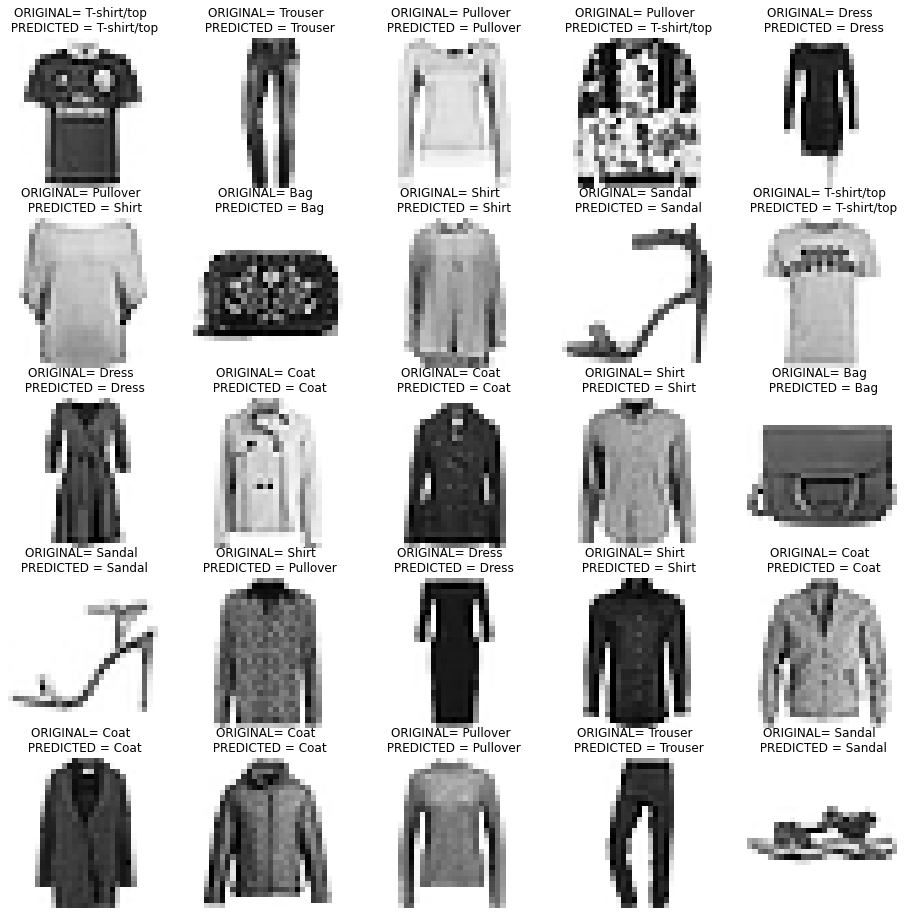

In [14]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[i].reshape(28,28),cmap="Greys")
    plt.axis('off')
    plt.title("ORIGINAL= {} \n PREDICTED = {}".format(class_labels[y_test[i]], class_labels[np.argmax(pred_test[i])]))